# ML Exp3
---------------------

* Aayush Malde (1911090)
* Aditya Malwade (1911091)
* Rahul Panchal (1911097)

--------------------------------------------------------------------------------

#Linear Regression on dummy dataset

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 
import random
plt.close('all')
np.random.seed(30) # Set seed
# Inputs
samples = 200
# Random samples (Uniformly distributed)
U1 = np.random.rand(samples,1) 
U2 = np.random.rand(samples,1)
# Random samples (normally distributed uncorrelated) 
S1 = np.sqrt(-2*np.log(U1))*np.cos(2*np.pi*U2)
S2 = np.sqrt(-2*np.log(U1))*np.sin(2*np.pi*U2)
E_S1 = np.mean(S1)
Var_S1 = np.mean(S1**2) - E_S1**2
sigma_S1 = np.sqrt(Var_S1)
E_S2 = np.mean(S2)
Var_S2 = np.mean(S2**2) - E_S2**2
sigma_S2 = np.sqrt(Var_S2)
Cov_S1_S2 = np.mean(S1*S2) - E_S1*E_S2
Corr_S1_S2 = Cov_S1_S2/sigma_S1/sigma_S2
print('corr(S1,S2) = ' + str(Corr_S1_S2)) 
# Correlated random samples (ignore this part)
mu_x = 0.5
mu_y = 0.66
sigma_x = 0.85
sigma_y = 1.24
rho = 0.75

X = mu_x + sigma_x * S1    #input
Y = mu_y + sigma_y * (rho*S1 + np.sqrt(1-rho**2)*S2) #desired output

E_X = np.mean(X)
Var_X = np.mean(X**2) - E_X**2
sigma_X = np.sqrt(Var_X)
E_Y = np.mean(Y)
Var_Y = np.mean(Y**2) - E_Y**2
sigma_Y = np.sqrt(Var_Y)
Cov_X_Y = np.mean(X*Y) - E_X*E_Y
Corr_X_Y = Cov_X_Y/sigma_X/sigma_Y
print('corr(X,Y) = ' + str(Corr_X_Y))

corr(S1,S2) = 0.14183667211624937
corr(X,Y) = 0.8194412208323065


Text(0, 0.5, 'Y')

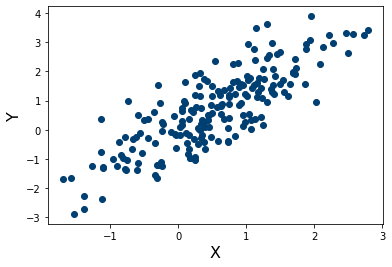

In [ ]:
# Generate plots
plt.subplot(1,1,1)
plt.plot(X,Y,linestyle="",marker="o",color="#003F72")
plt.xlabel('X', fontsize=16)
plt.ylabel('Y', fontsize=16)

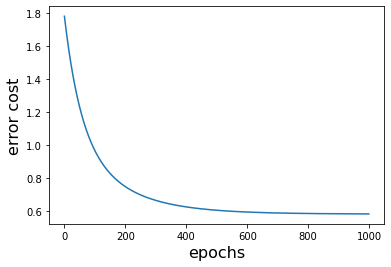

In [ ]:
w=np.random.random()
b=np.random.random()

epochs = 1000
alpha = 0.003
error = []
#gradient descent starts
for i in range(epochs):
  output = w*X + b
  mean_sq_error = np.square(np.subtract(Y,output)).mean() #calculating error
  error.append(mean_sq_error)

  #adjusting weights
  weight_derivative = -(2/samples)*sum(X*(Y-output))
  bias_derivative = -(2/samples)*sum((Y-output))
  w = w - alpha*weight_derivative
  b = b - alpha*bias_derivative

plt.plot(range(0,epochs),error)
plt.xlabel('epochs', fontsize=16)
plt.ylabel('error cost', fontsize=16)
plt.show()




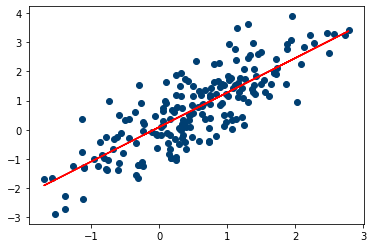

In [ ]:
regression_line = [(w*x)+b for x in X]
plt.scatter(X,Y,color='#003F72')
plt.plot(X, regression_line,color='#FF0000')
plt.show()

--------------------------------------------------------------------------------

#Multi-Variate Linear Regression

In [ ]:
# making a dummy dataset of 200 samples with each sample having 4 attributes
x0 = np.ones((samples,1))   #column added for bias
x1 = np.random.rand(samples,1)
x2 = np.random.randint(1, 6, size=(samples, 1))
x3 = np.random.uniform(0.0, 7.5, size=(samples, 1))
x4 = np.random.standard_exponential((samples, 1))

Y = np.random.rand(samples, 1)   #desired output

# print(x0.shape)
# print(x1.shape)
# print(x2.shape)
# print(x3.shape)
# print(x4.shape)
# print(Y.shape)
X=[]
X.append(x0)
X.append(x1)
X.append(x2)
X.append(x3)
X.append(x4)

X=np.squeeze(X) #making a matrix of all the samples and their attributes
# print(np.shape(X))


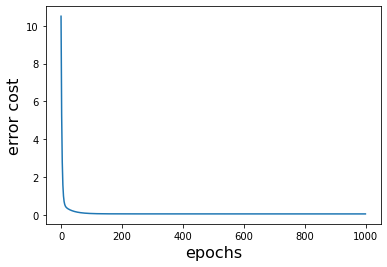

In [ ]:
theta = np.random.random(size=(5, 1))

epochs = 1000
alpha = 0.003


cost=[]
for i in range(epochs):
  output = np.dot(np.transpose(X),theta)
  error = Y - output
  cost_calc = np.dot(np.transpose(error),error)/(2*samples) #calculating mean squared error

  cost.append(cost_calc)

  weight_derivative = -(2/samples)*(np.dot(X,error)) # adjusting weigths according to error
  theta = theta - alpha*weight_derivative


#Plotting cost vs epochs graph
cost=np.squeeze(cost)
plt.plot(range(0,epochs),cost)
plt.xlabel('epochs', fontsize=16)
plt.ylabel('error cost', fontsize=16)
plt.show()
 
  
  


In [ ]:
x0 = np.ones((samples,1))   #column added for bias
x1 = np.random.rand(samples,1)
x2 = np.random.randint(1, 10, size=(samples, 1))
# x3 = np.random.uniform(0.0, 1.0, size=(samples, 1))
# x4 = np.random.standard_exponential((samples, 1))

Y = np.random.rand(samples, 1)   #desired output

# print(x0.shape)
# print(x1.shape)
# print(x2.shape)
# print(x3.shape)
# print(x4.shape)
# print(Y.shape)
X=[]
X.append(x0)
X.append(x1)
# X.append(x2)
X.append(x3)
# X.append(x4)

X=np.squeeze(X) #making a matrix of all the samples and their attributes
# print(np.shape(X))

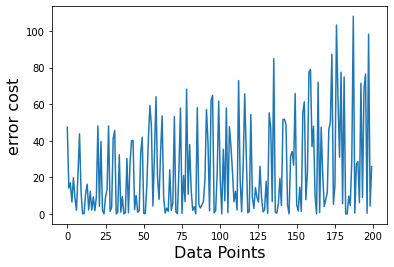

In [ ]:
#stochastic gradient descent
Theta= np.random.random(size=(3, 1))
X_trans = np.transpose(X) # 200,5
Cost=[]
alpha = 0.003
for i in range(len(X[1])):
  output = np.dot( np.reshape(X_trans[i], (1, 3)),Theta)
  Error = Y[i] - output
  # print(error)
  cost_Calc = Error*Error/2*samples

  Cost.append(cost_Calc)
  Weight_derivative = np.transpose(Error*X_trans[i])
  Theta = Theta - alpha*Weight_derivative 

#Plotting cost vs epochs graph
Cost = np.squeeze(Cost)
plt.plot(range(0,len(X[1])),Cost)
plt.xlabel('Data Points', fontsize=16)
plt.ylabel('error cost', fontsize=16)
plt.show()

--------------------------------------------------------------------------------

##Stochastic Gradient Descent

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Linear Regression using SciKitLearn library

In [ ]:
import pandas as pd

dataset= pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Real estate.csv')
dataset

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [ ]:
X = dataset[['X1 transaction date', 'X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores','X5 latitude','X6 longitude']]
y = dataset['Y house price of unit area']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3)

In [ ]:
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

predictions = multi_model.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  0.5312491057389026
The rmse is:  9.334773756682019


In [ ]:
coefficients = multi_model.coef_
intercept = multi_model.intercept_
def calculate_house_price(X1, X2, X3, X4,X5,X6):
  return (X1 * coefficients[0]) + (X2 * coefficients[1]) + (X3 * coefficients[2]) + (X4 * coefficients[3]) + (X5 * coefficients[4])+ (X6 * coefficients[5]) + intercept

In [ ]:
print(calculate_house_price(2013.56, 4, 120,4,24.4563,124.9743))

197.19588697703148
